
**Contents:**
1. [Importing libraries](#1) 
1. [Read data files](#2) 
1. [Checking 'sales' df](#3)
* 1. [EDA Visualization for sales](#3)
1. [Visualizations](#4) 
1. [binnig for prices](#5) 
1. [Checking 'shop' df](#6) 
1. [Checking 'item' df](#7) 
1. [Corelation](#8) 
1. [Checking 'categories' df](#9) 
1. [item_cnt_day convert monthly](#10) 
1. [normalization](#11)  
1. [LinearRegression](#12) 
1. [RandomForest model and Measures](#13)

<a id = '1'> </a> </br>
# Importing libraries

In [24]:
#for playing data
import numpy as np
import pandas as pd

# for visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
# for missing value visualizations
import missingno as msno
# for model and scores
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier

<a id = '2'> </a> </br>
# Read data files

In [2]:
sales_train = pd.read_csv('dataset/sales_train.csv')
test_data = pd.read_csv('dataset/test.csv')
sample = pd.read_csv('dataset/sample_submission.csv')
shop = pd.read_csv('dataset/shops.csv')
item = pd.read_csv('dataset/items.csv')
categories = pd.read_csv('dataset/item_categories.csv')

<a id = '3'> </a> </br>
## Checking 'sales' df
### * EDA Visualization for sales

In [3]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
sales_train.shape

(2935849, 6)

In [5]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [6]:
print("Missing value: ",sales_train.isnull().sum().sum())

Missing value:  0


# changing date column object to datetime

In [7]:
sales_train['date'] = pd.to_datetime(sales_train['date'])
sales_train.dtypes

date              datetime64[ns]
date_block_num             int64
shop_id                    int64
item_id                    int64
item_price               float64
item_cnt_day             float64
dtype: object

In [8]:
# date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
sales_train['date_block_num'].max()

33

<a id = '4'> </a> </br>
## Visualizations

Text(0.5, 1.0, 'item_cnt_day')

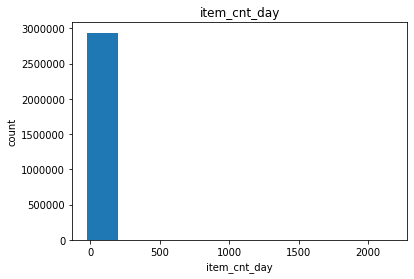

In [9]:
plt.hist(sales_train["item_cnt_day"])
plt.xlabel("item_cnt_day")
plt.ylabel("count")
plt.title("item_cnt_day")

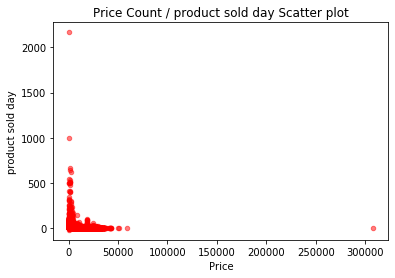

In [10]:
sales_train.plot(kind='scatter',x='item_price',y='item_cnt_day',alpha=0.5,color='red')
plt.xlabel('Price')
plt.ylabel('product sold day')
plt.title('Price Count / product sold day Scatter plot')
plt.show()

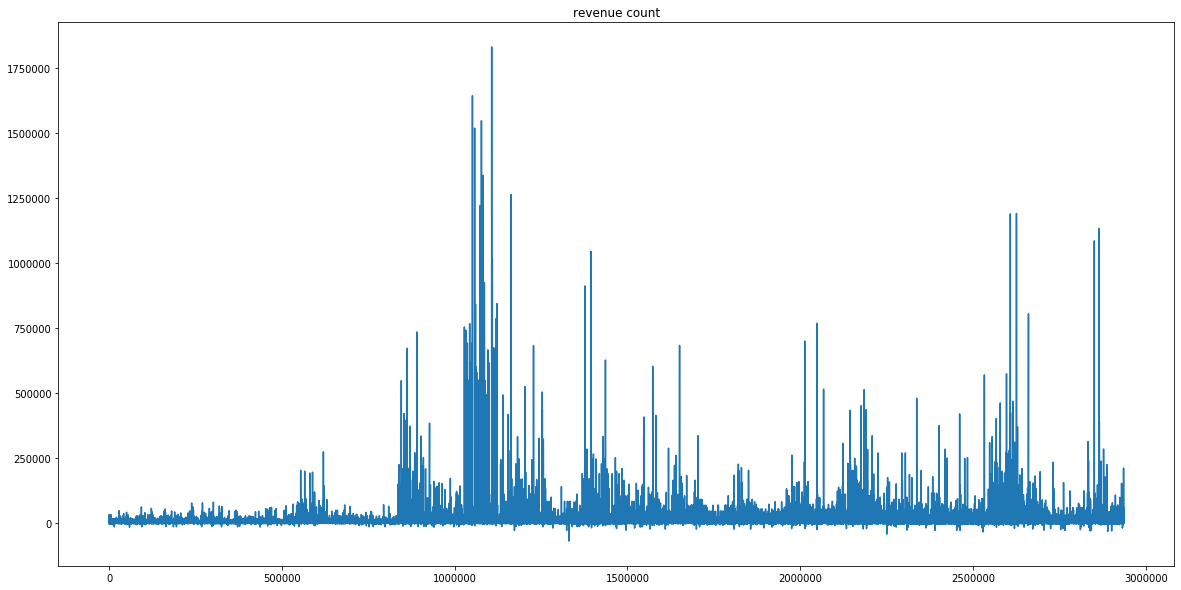

In [11]:
# Gelir - revenue
plt.figure(figsize=(20,10))
plt.title("revenue count")
revenue = sales_train['item_price']*sales_train['item_cnt_day']
revenue.plot()

<a id = '5'> </a> </br>
# binnig for prices

In [12]:
bins = np.linspace(min(sales_train['item_price']),max(sales_train['item_price']),4)
group_names = ["Low", "Medium", "High"]
sales_train['item_price_binned'] = pd.cut(sales_train['item_price'],bins,labels=group_names,include_lowest=True)

In [13]:
sales_train[(sales_train['item_price']>50000)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_price_binned
885138,2013-09-17,8,12,11365,59200.0,1.0,Low
1163158,2013-12-13,11,12,6066,307980.0,1.0,High
1488135,2014-03-20,14,25,13199,50999.0,1.0,Low


Text(0.5, 1.0, 'item_cnt_day bins')

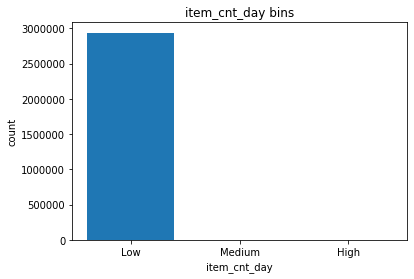

In [16]:
import matplotlib as plt
from matplotlib import pyplot
from matplotlib import pyplot
pyplot.bar(group_names, sales_train["item_price_binned"].value_counts())
plt.pyplot.xlabel("item_cnt_day")
plt.pyplot.ylabel("count")
plt.pyplot.title("item_cnt_day bins")

<a id = '6'> </a> </br>
* ## Checking 'shop' df

In [17]:
shop.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [18]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


<a id = '7'> </a> </br>
* ## Checking 'item' df

In [19]:
item.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [20]:
cat_id = item['item_category_id'].value_counts()
cat_id

40    5035
55    2365
37    1780
31    1125
58     790
      ... 
50       2
1        2
51       1
10       1
79       1
Name: item_category_id, Length: 84, dtype: int64

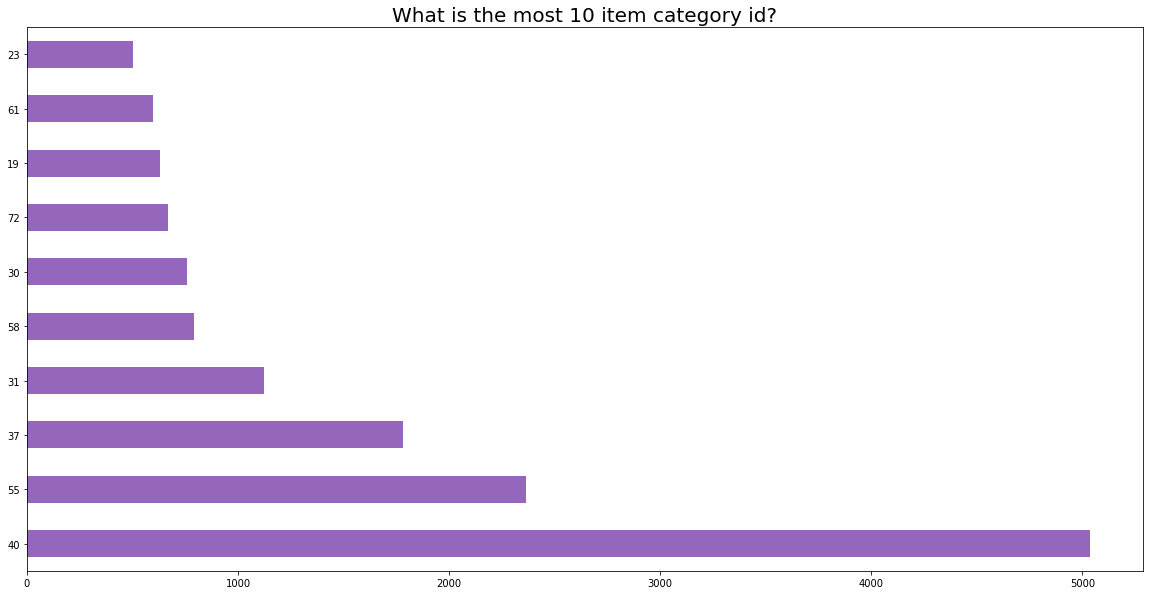

In [27]:
cat_id.head(10).plot(kind='barh', color='C4' , figsize=(20,10))
plt.title("What is the most 10 item category id?", fontsize=20)
plt.show()

<Figure size 720x720 with 0 Axes>

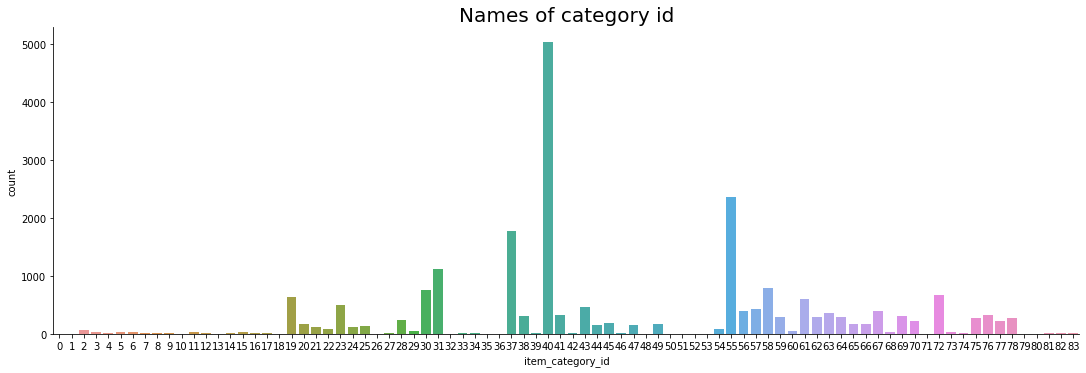

In [25]:
plt.figure(figsize=(10,10))
sns.catplot(x='item_category_id',data=item, kind="count",aspect=3)
plt.title('Names of category id', fontsize = 20)
plt.show()

<a id = '8'> </a> </br>
# corelation

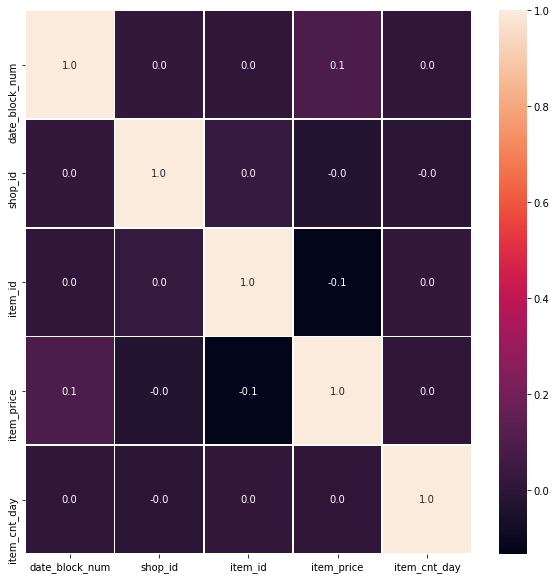

In [26]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(sales_train.corr(),annot=True, linewidths=.7,fmt ='.1f',ax=ax)
plt.show()

<a id = '9'> </a> </br>
* ## Checking 'categories' df

In [28]:
categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [29]:
cat_name = categories['item_category_name'].value_counts()
cat_name

Подарки - Сувениры (в навеску)    1
Аксессуары - XBOX 360             1
Кино - Blu-Ray 4K                 1
Музыка - Музыкальное видео        1
Игровые консоли - XBOX 360        1
                                 ..
Книги - Аудиокниги 1С             1
Книги - Артбуки, энциклопедии     1
Кино - DVD                        1
PC - Гарнитуры/Наушники           1
Игровые консоли - PS2             1
Name: item_category_name, Length: 84, dtype: int64

<a id = '10'> </a> </br>
# item_cnt_day convert monthly
* ## günlük olarak olan işlemi aylık olarak convert

In [30]:
monthly_sales=sales_train.agg({'item_cnt_day' : 'sum', 'item_price' : 'sum'})
monthly_sales.head()

item_cnt_day    3.648206e+06
item_price      2.615411e+09
dtype: float64

In [31]:
sales_train.rename(columns={'item_cnt_day':'item_monthly'}, inplace=True)

In [32]:
month_count = monthly_sales.item_cnt_day

In [33]:
monthly_sales.head()

item_cnt_day    3.648206e+06
item_price      2.615411e+09
dtype: float64

<a id = '10'> </a> </br>
## günlük değeri aylık olarak atama

In [35]:
sales_train = sales_train.assign(item_monthly='3.6482060')

In [36]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_monthly,item_price_binned
0,2013-02-01,0,59,22154,999.00,3.6482060,Low
1,2013-03-01,0,25,2552,899.00,3.6482060,Low
2,2013-05-01,0,25,2552,899.00,3.6482060,Low
3,2013-06-01,0,25,2554,1709.05,3.6482060,Low
4,2013-01-15,0,25,2555,1099.00,3.6482060,Low


<a id = '11'> </a> </br>
# normalization

In [37]:
# simple scale
#sales_train['item_price'] = sales_train["item_price"]/sales_train["item_price"].max()

In [38]:
# z-score
sales_train['item_price'] = (sales_train["item_price"]-sales_train["item_price"].mean())/sales_train["item_price"].std()

In [39]:
sales_train['item_price'].head()

0    0.062520
1    0.004710
2    0.004710
3    0.473001
4    0.120330
Name: item_price, dtype: float64

In [40]:
X= sales_train[['item_monthly']]
y= sales_train['item_price']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<a id = '12'> </a> </br>
# Linear Regression

In [42]:

reg = LinearRegression()

reg.fit(X_train,y_train)
preds = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,preds))
print('MSR',rmse)
print('Score',reg.score(X_test,y_test))

MSR 1.010248295891517
Score -1.0337022482431735e-07


<a id = '13'> </a> </br>
# RandomForest model and Measures

In [43]:

rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

rf.fit(X_train, y_train);

predictions = rf.predict(X_test)

In [44]:
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
#Score
print("Score :",rf.score(X_test, y_test))

Mean Absolute Error: 0.45 degrees.
Score : -7.146036073990558e-08


In [45]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,predictions))

1.0102482797730756

In [46]:
from sklearn.model_selection import cross_val_score

score_val = cross_val_score(reg,X_train,y_train,cv=3)
np.mean(score_val)

-2.833424832537901e-07

In [47]:
score_train = mean_squared_error(y_test, predictions)
print("mean squared error: ",score_train)

mean squared error:  1.0206015867844587
